In [206]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pickle
RANDOM_STATE = 1000

In [207]:
df= pd.read_csv("data/final_dataset.csv")
df.rename(columns=lambda x: x.replace('  ', ' '), inplace=True)
df.head()

,Diseases,itching,skin rash,nodal skin eruptions,dischromic patches,continuous sneezing,shivering,chills,watering from eyes,stomach pain,...,bladder discomfort,foul smell of urine,continuous feel of urine,skin peeling,silver like dusting,small dents in nails,inflammatory nails,blister,red sore around nose,yellow crust ooze
0,Fungal infection,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [208]:
symptoms_list = df.drop('Diseases', axis = 1).columns
disease_list = df['Diseases'].unique()

In [209]:
symptoms_list

Index(['itching', 'skin rash', 'nodal skin eruptions', 'dischromic patches',
       'continuous sneezing', 'shivering', 'chills', 'watering from eyes',
       'stomach pain', 'acidity',
       ...
       'bladder discomfort', 'foul smell of urine', 'continuous feel of urine',
       'skin peeling', 'silver like dusting', 'small dents in nails',
       'inflammatory nails', 'blister', 'red sore around nose',
       'yellow crust ooze'],
      dtype='object', length=131)

In [210]:
disease_list

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

Lets add severity to the symptoms

In [211]:
df_severity = pd.read_csv('data/Symptom-severity.csv')
df_severity['Symptom'] = df_severity['Symptom'].str.replace('_', ' ')
df_severity.head()

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5


In [212]:
print(symptoms_list[122])

foul smell of urine


In [213]:
for i in symptoms_list :
    disease_severity = df_severity.loc[df_severity['Symptom'] == str(i), 'weight'].values[0]  
    df.loc[df[str(i)] == 1, str(i)] = disease_severity

In [214]:
df.head()

,Diseases,itching,skin rash,nodal skin eruptions,dischromic patches,continuous sneezing,shivering,chills,watering from eyes,stomach pain,...,bladder discomfort,foul smell of urine,continuous feel of urine,skin peeling,silver like dusting,small dents in nails,inflammatory nails,blister,red sore around nose,yellow crust ooze
0,Fungal infection,1,3,4,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,3,4,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,0,4,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [215]:
df.isnull().sum()

Diseases                0
itching                 0
skin rash               0
nodal skin eruptions    0
dischromic patches      0
                       ..
small dents in nails    0
inflammatory nails      0
blister                 0
red sore around nose    0
yellow crust ooze       0
Length: 132, dtype: int64

In [216]:
df.describe()

,itching,skin rash,nodal skin eruptions,dischromic patches,continuous sneezing,shivering,chills,watering from eyes,stomach pain,acidity,...,bladder discomfort,foul smell of urine,continuous feel of urine,skin peeling,silver like dusting,small dents in nails,inflammatory nails,blister,red sore around nose,yellow crust ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.479268,0.087805,0.131707,0.180488,0.109756,0.486585,0.087805,0.225610,0.135366,...,0.092683,0.103659,0.139024,0.069512,0.046341,0.046341,0.046341,0.092683,0.046341,0.069512
std,0.344730,1.099251,0.586157,0.879235,0.830371,0.732696,1.106002,0.586157,1.037963,0.622778,...,0.601843,0.712496,0.902765,0.451382,0.300922,0.300922,0.300922,0.601843,0.300922,0.451382
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,3.000000,4.000000,6.000000,4.000000,5.000000,3.000000,4.000000,5.000000,3.000000,...,4.000000,5.000000,6.000000,3.000000,2.000000,2.000000,2.000000,4.000000,2.000000,3.000000


In [217]:
from sklearn.model_selection import train_test_split
y= df['Diseases']
X = df.drop('Diseases', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = RANDOM_STATE)

In [218]:
X_train

,itching,skin rash,nodal skin eruptions,dischromic patches,continuous sneezing,shivering,chills,watering from eyes,stomach pain,acidity,...,bladder discomfort,foul smell of urine,continuous feel of urine,skin peeling,silver like dusting,small dents in nails,inflammatory nails,blister,red sore around nose,yellow crust ooze
4482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
631,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3776,1,3,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
4695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [219]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute correlation value
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [220]:
names = correlation(df.drop('Diseases', axis = 1),0.95)

We will remove those features which have very high correlation among each other

In [221]:
print(names)

{'stomach bleeding', 'increased appetite', 'redness of eyes', 'runny nose', 'congestion', 'loss of smell', 'abnormal menstruation', 'acute liver failure', 'enlarged thyroid', 'swollen extremeties', 'drying and tingling lips', 'sinus pressure', 'slurred speech', 'brittle nails', 'receiving unsterile injections', 'palpitations', 'receiving blood transfusion', 'polyuria'}


In [222]:
features_drop = []
for i in names:
    features_drop.append(i)

In [223]:
X = X.drop(features_drop[1:], axis = 1)

In [224]:
symptom_list = X.columns

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4 , random_state = RANDOM_STATE)

In [226]:
def learning_curve(model, X_train, y_train, X_test, y_test):
    """
    A function to plot the learning curve.
    
    Paramters:
    ---------
    model: object
           An object instantiated with XGBoost classifier
    X_train: array like
             Training features
    y_train: array like
             Training labels
    X_test: array like
            Validation features
    y_test: array like
            Validation labels
            
    Returns:
    --------
    None
    
            
    """
    eval_set = [(X_train, y_train),(X_test, y_test)]
    model.fit(X_train, y_train, eval_metric = ["logloss"], eval_set = eval_set, verbose = False)
    print("F1 Score Train: ",f1_score(y_train, model.predict(X_train), average = 'weighted'))
    print("F1 Score Test: ",f1_score(y_test, model.predict(X_test), average = 'weighted'))
    results = model.evals_result()
    num_tree = len(results['validation_0']['logloss'])
    plt.figure(figsize = (8,8))
    plt.plot(range(0, num_tree), results['validation_0']['logloss'], label = 'Training')
    plt.plot(range(0, num_tree), results['validation_1']['logloss'], label = 'Validation')
    plt.legend()
    plt.xlabel("Number of trees")
    plt.ylabel("Log loss")
    plt.title("Learning Curve")
    plt.show()



Train Logistic Regression

In [227]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
log_reg = LogisticRegression(penalty = 'none' , max_iter= 3 )
log_reg.fit(X_train, y_train)

c:\users\acer\documents\pythons\neuralnetworkcarsimulations\my new environment\car\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\users\acer\documents\pythons\neuralnetworkcarsimulations\my new environment\car\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=3, penalty='none')

In [228]:
predicted = log_reg.predict(np.expand_dims(X_train.iloc[0], axis=0))

c:\users\acer\documents\pythons\neuralnetworkcarsimulations\my new environment\car\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [229]:
predicted[0]

'Chronic cholestasis'

In [230]:
print("Train f1_score:", f1_score(y_train, log_reg.predict(X_train), average = 'weighted'))
print("Test f1_score:", f1_score(y_test, log_reg.predict(X_test), average = 'weighted'))

Train f1_score: 0.9370360832530081
Test f1_score: 0.9417626682386964


TRAIN RANDOM FOREST

In [231]:
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(n_estimators = 50 ,max_depth = 5, random_state = RANDOM_STATE)
random_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=1000)

In [232]:
predicted = random_clf.predict(np.expand_dims(X_train.iloc[0], axis=0))

c:\users\acer\documents\pythons\neuralnetworkcarsimulations\my new environment\car\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [233]:
predicted[0]

'Chronic cholestasis'

In [234]:
print("Train f1_score:", f1_score(y_train, random_clf.predict(X_train), average = 'weighted'))
print("Test f1_score:", f1_score(y_test, random_clf.predict(X_test), average = 'weighted'))

Train f1_score: 0.9881121737218205
Test f1_score: 0.9940263667455995


Train XGBOOST

In [235]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score
enc = OneHotEncoder()
one_hot = enc.fit_transform(df[['Diseases']])
y = one_hot.toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = RANDOM_STATE)

In [236]:
print(one_hot.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [237]:
from xgboost import XGBClassifier

In [238]:
def learning_curve(model, X_train, y_train, X_test, y_test):
    """
    A function to plot the learning curve.
    
    Paramters:
    ---------
    model: object
           An object instantiated with XGBoost classifier
    X_train: array like
             Training features
    y_train: array like
             Training labels
    X_test: array like
            Validation features
    y_test: array like
            Validation labels
            
    Returns:
    --------
    None
    
            
    """
    eval_set = [(X_train, y_train),(X_test, y_test)]
    model.fit(X_train, y_train, eval_metric = ["logloss"], eval_set = eval_set, verbose = False)
    print("F1 Score Train: ",f1_score(y_train, model.predict(X_train), average = 'weighted'))
    print("F1 Score Test: ",f1_score(y_test, model.predict(X_test), average = 'weighted'))
    results = model.evals_result()
    num_tree = len(results['validation_0']['logloss'])
    plt.figure(figsize = (8,8))
    plt.plot(range(0, num_tree), results['validation_0']['logloss'], label = 'Training')
    plt.plot(range(0, num_tree), results['validation_1']['logloss'], label = 'Validation')
    plt.legend()
    plt.xlabel("Number of trees")
    plt.ylabel("Log loss")
    plt.title("Learning Curve")
    plt.show()


In [246]:
xgb = XGBClassifier(n_estimators = 15 ,max_depth = 4, random_state = RANDOM_STATE)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=15, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1000, ...)

In [247]:
print("Train f1_score:", f1_score(y_train, xgb.predict(X_train), average = 'weighted'))
print("Test f1_score:", f1_score(y_test, xgb.predict(X_test), average = 'weighted'))

Train f1_score: 0.9983096491038739
Test f1_score: 0.9973404693544876


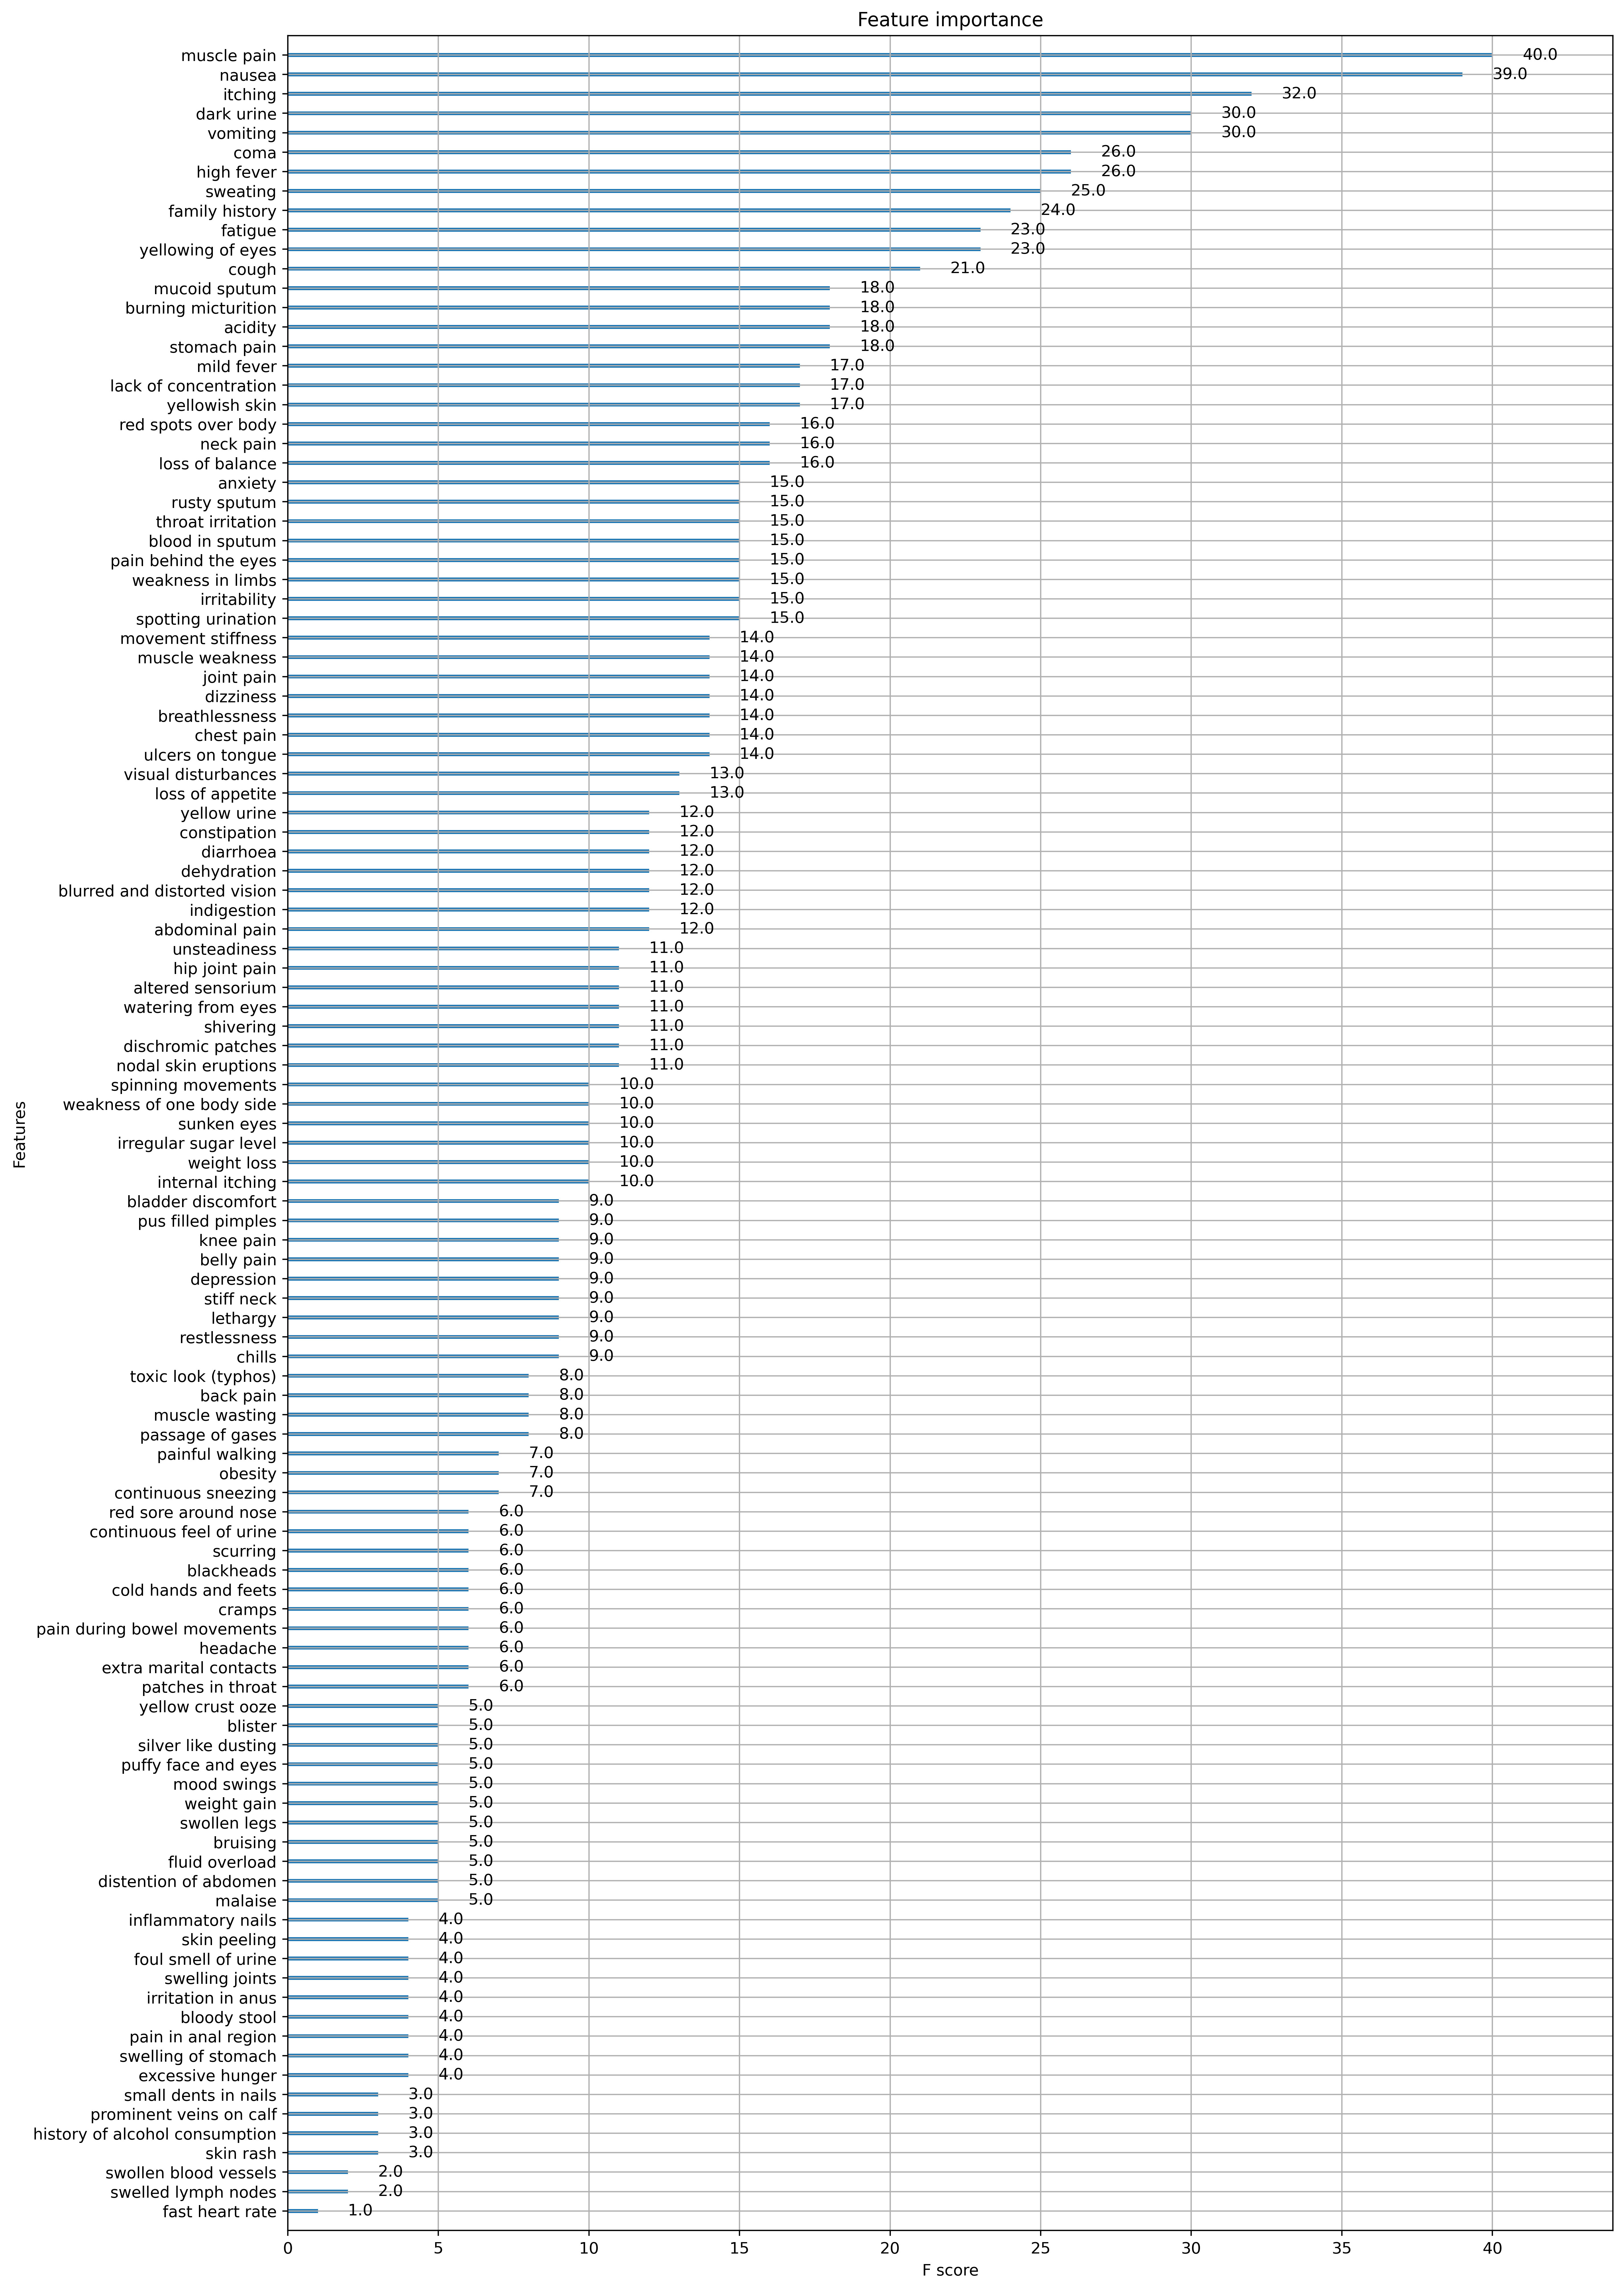

In [248]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(15,25), dpi=400)
plot_importance(xgb,ax=ax)
plt.show()

In [249]:
to_predict = X_train.iloc[1]
to_predict = np.expand_dims(to_predict, axis=0) 
predicted = xgb.predict(to_predict)
enc.inverse_transform(predicted)

array([['Hepatitis D']], dtype=object)

In [250]:
print(predicted)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [107]:
pickle.dump(xgb, open("xgb_classifier.pickle.dat", "wb"))
pickle.dump(log_reg, open("log_reg.pickle.dat", "wb"))
pickle.dump(random_clf, open("random_clf.pickle.dat", "wb"))
pickle.dump(enc, open("encoder.pickle.dat", "wb"))
pickle.dump(symptom_list, open("symptom_list.pickle.dat", "wb"))